In [14]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

In [15]:
first_year=1892
last_year=2024
years=np.linspace(first_year,last_year,last_year-first_year+1)

In [16]:
df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/tp_since_1892/Precip_Uccle_1892.csv'
df=pd.read_csv(df_path,delimiter=',')
df.head()

,DAY,PRECIP_QUANTITY
0,1892-01-01,1.94
1,1892-01-02,0.49
2,1892-01-03,0.00
3,1892-01-04,0.00
4,1892-01-05,0.87


In [17]:
df['DAY'] = pd.to_datetime(df['DAY'])

In [18]:
df['year'] = df['DAY'].dt.to_period('Y')
df['year_month']=df['DAY'].dt.to_period('M')
df['month']=df['DAY'].dt.month

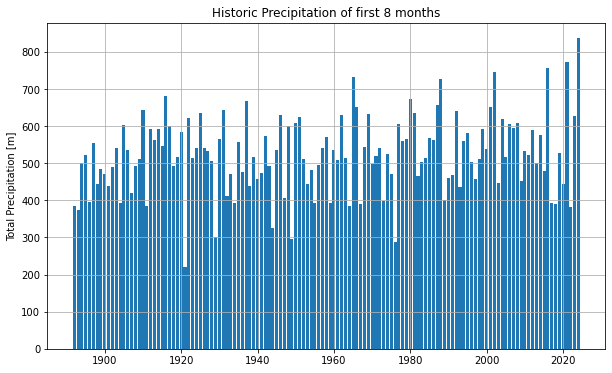

In [19]:
tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(years, tp_first_8_months['PRECIP_QUANTITY'], label='Total Precipitation')
plt.ylabel('Total Precipitation [m]')
plt.title('Historic Precipitation of first 8 months')
plt.grid()
#z = np.polyfit(years, historic_precipitation, 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()


In [20]:
extreme_events=tp_first_8_months[tp_first_8_months['PRECIP_QUANTITY']>500]
tp_first_8_months.shape

(133, 2)

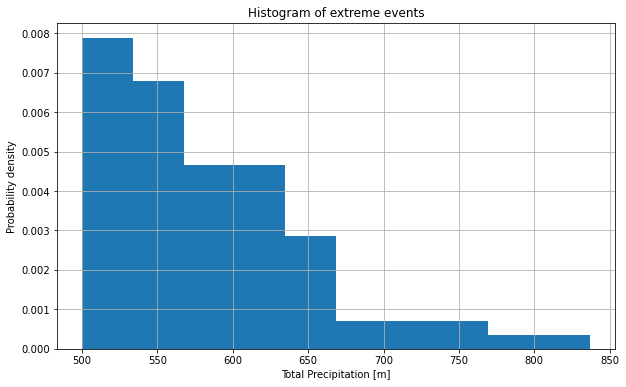

In [42]:
#plot a histogram of the extreme events with a total area of 83/133
plt.figure(figsize=(10, 6))
plt.hist(extreme_events['PRECIP_QUANTITY'],bins=10,density=True)
plt.ylabel('Probability density')
plt.xlabel('Total Precipitation [m]')
plt.title('Histogram of extreme events')
plt.grid()
plt.show()



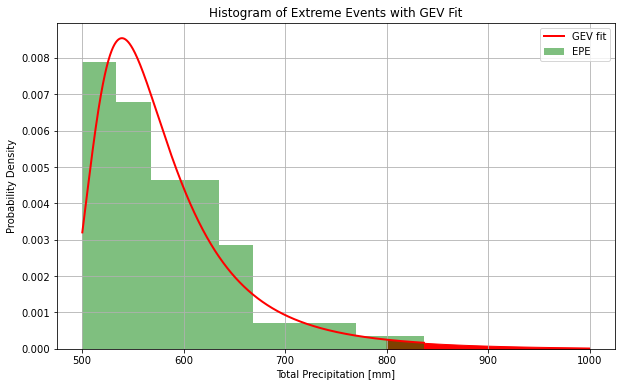

-0.23187964638670944 548.1202400794417 44.161354107627886


In [22]:
from scipy.stats import genextreme

# Fit the GEV distribution to the data
shape, loc, scale = genextreme.fit(extreme_events['PRECIP_QUANTITY'])


plt.figure(figsize=(10, 6))
plt.hist(extreme_events['PRECIP_QUANTITY'], bins=10, density=True, alpha=0.5, color='g', label='EPE')

# Generate x values for the GEV curve
x = np.linspace(extreme_events['PRECIP_QUANTITY'].min(), extreme_events['PRECIP_QUANTITY'].max(), 1000)
# Plot the GEV curve
plt.plot(x, genextreme.pdf(x, shape, loc, scale), 'r-', lw=2, label='GEV fit')
#color the region below the GEV curve from 800 to 1000
x_fill = np.linspace(800, 1000, 1000)
plt.fill_between(x_fill, genextreme.pdf(x_fill, shape, loc, scale), color='red', alpha=1)



plt.ylabel('Probability Density')
plt.xlabel('Total Precipitation [mm]')
plt.title('Histogram of Extreme Events with GEV Fit')
plt.grid()
plt.legend()
plt.show()
print(shape, loc, scale)    

In [43]:
#calculate the integral of the GEV curve from 800    
from scipy.integrate import quad
integral, error = quad(genextreme.pdf, 836, 100000, args=(shape, loc, scale))
integral*83/133  #multiplied by the total area of the histogram


0.011650264822240932

In [24]:
rainy_days = df[df['PRECIP_QUANTITY']!=0]

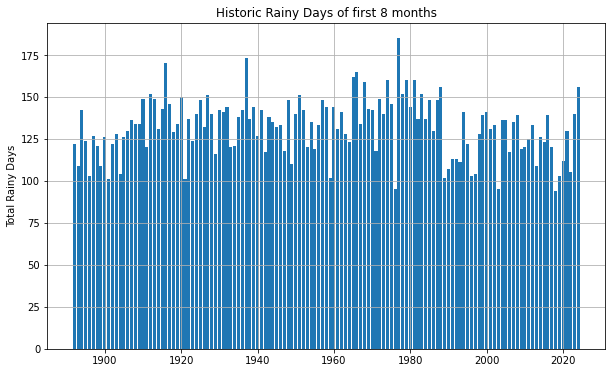

In [25]:
rainy_days_8_months = rainy_days[rainy_days['month']<9].groupby('year')['PRECIP_QUANTITY'].count().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(years, rainy_days_8_months['PRECIP_QUANTITY'], label='Total Precipitation')
plt.ylabel('Total Rainy Days')
plt.title('Historic Rainy Days of first 8 months')
plt.grid()
#z = np.polyfit(years, rainy_days_8_months['PRECIP_QUANTITY'], 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()

In [26]:
#WD50

In [32]:
threshold=tp_first_8_months['PRECIP_QUANTITY']*0.5

In [28]:
rainy_days_ranked=rainy_days.sort_values(by=['year','PRECIP_QUANTITY'],ascending=[True,False])

In [39]:
# Initialize the list to store the number of days needed per year to reach the threshold
wd50 = []


for this_year in years:
    this_year = int(this_year)
    i=f'{this_year}'
    cumsum = 0
    days_count = 0 
    for index, row in rainy_days_ranked[rainy_days_ranked['year'] == i].iterrows():
        cumsum += row['PRECIP_QUANTITY']
        days_count += 1 
        #if cumsum > threshold[int(this_year) - first_year]:
        if cumsum > 300:    
            wd50.append(days_count) 
            break

    
    # Debugging print statements
    #print(f"Year: {this_year}, Cumulative Sum: {cumsum}, Days Needed: {days_count}, Threshold: {threshold[this_year - first_year]}")


In [40]:

#la integral de esto tiene que ser igual a la probabilidad de tener mas de 500 osea 83/133
#la y axis tiene entonces que ser una densidad de probabilidad
#Fitten una GEV (Gamma) y encontrar el quantile en el cual du coup se encuentra el caso de mas de 800
rainy_days_ranked[rainy_days_ranked['year']=='2024'][0:20]

,DAY,PRECIP_QUANTITY,year,year_month,month
48402,2024-07-09,43.5,2024,2024-07,7
48424,2024-07-31,37.5,2024,2024-07,7
48437,2024-08-13,31.5,2024,2024-08,8
48426,2024-08-02,29.0,2024,2024-08,8
48248,2024-02-06,22.5,2024,2024-02,2
48213,2024-01-02,20.6,2024,2024-01,1
48349,2024-05-17,20.1,2024,2024-05,5
48405,2024-07-12,19.1,2024,2024-07,7
48464,2024-09-09,19.0,2024,2024-09,9
48381,2024-06-18,18.7,2024,2024-06,6


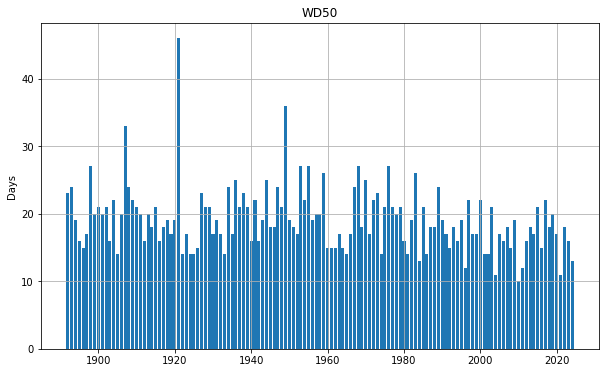

Moyenne de WD50 de 1892-1992: 19.99 et de 1992-2024: 16.625


In [41]:
plt.figure(figsize=(10, 6))
plt.bar(years, wd50, label='Total Precipitation')
plt.ylabel('Days')
plt.title('WD50')
plt.grid()
#z = np.polyfit(years, wd50, 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')

plt.show()

print(f'Moyenne de WD50 de 1892-1992: {np.mean(wd50[0:100])} et de 1992-2024: {np.mean(wd50[101:])}')